<span style="font-size: 24px;">Visualize the loss curves</span>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

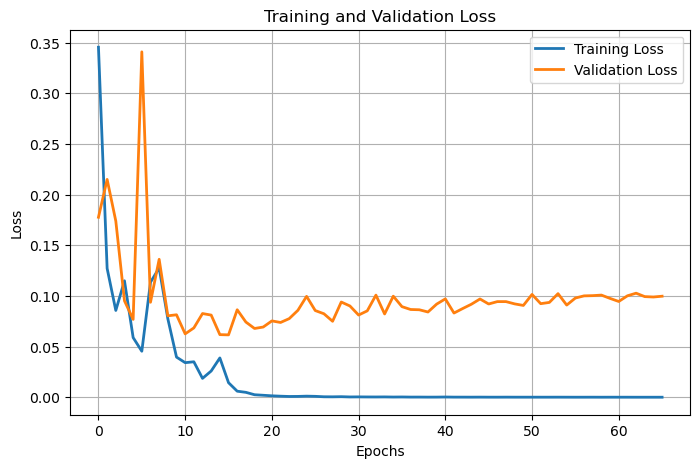

In [6]:
history = np.load("../src/history/cnn_training_history.npy", allow_pickle=True).item()


# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history["loss"], label="Training Loss", linewidth=2)
plt.plot(history["val_loss"], label="Validation Loss", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()